In [1]:
! pip install jupyter scikit-learn pandas seaborn numpy

You should consider upgrading via the '/home/peakbreaker/Documents/Clients/ciber/tut/presentation/ml_prod_tuts/notebooks/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/peakbreaker/Documents/Clients/ciber/tut/presentation/ml_prod_tuts/notebooks/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


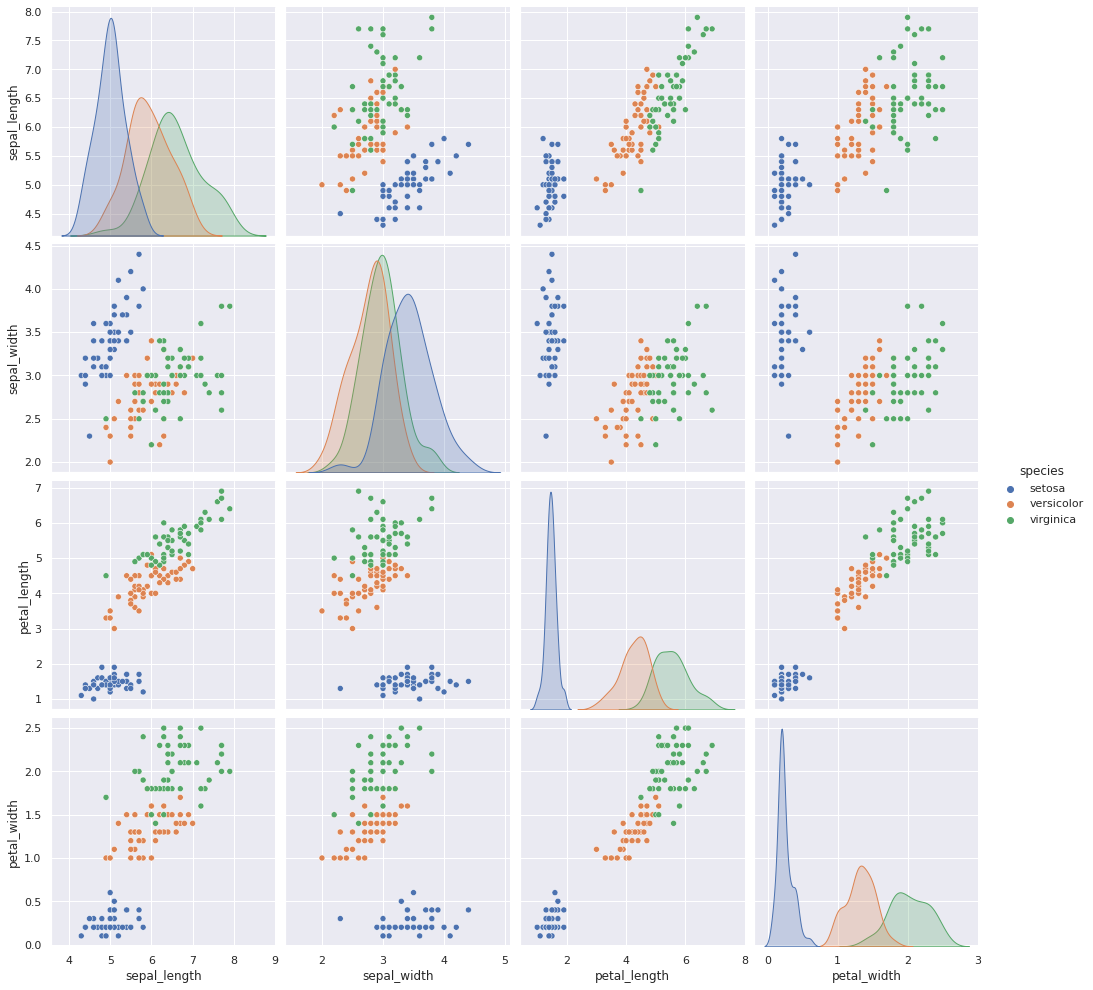

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=3.5);

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression # 1. choose model class
model = LogisticRegression()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

/home/peakbreaker/Documents/Clients/ciber/tut/presentation/ml_prod_tuts/notebooks/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [14]:
data = model.predict([[5.1,3.5,1.4,0.2], [4.9,3.0,1.4,0.2], [6.5,3.0,5.2.ipynb_checkpoints/2.0]])

In [16]:
data.tolist()

['setosa', 'setosa', 'virginica']

### In one file

In [13]:
%%writefile train_model.py
import seaborn as sns
import pickle
iris = sns.load_dataset('iris')
iris.head()

# Select features and target
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

# Model
from sklearn.linear_model import LogisticRegression # 1. choose model class
model = LogisticRegression()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

Overwriting train_model.py
